# Importing libraries

In [47]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

# Function to preprocess the dataset (handle missing values, scaling, train/test split)


In [48]:
def preprocess_data(dataset, target_column):
    # Drop rows with missing target values (if any)
    dataset = dataset.dropna(subset=[target_column])

    # Separating the features (X) and target (y)
    X = dataset.drop(columns=[target_column])
    y = dataset[target_column]

    # Split the data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features (scale the data)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

# Function to evaluate models using precision, recall, f1 score, and other metrics


In [49]:
def evaluate_model(y_true, y_pred):
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred.round(), average='weighted', zero_division=1)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return precision, recall, f1, mse, r2


# Load the datasets


In [50]:
dataset_kc1 = pd.read_csv('csv_result-KC1.csv')
dataset_mw1 = pd.read_csv('csv_result-MW1.csv')
dataset_pc5 = pd.read_csv('csv_result-PC5.csv')
dataset_mc1 = pd.read_csv('csv_result-MC1.csv')


# Preprocess the KC1, JM1, PC5, MC1 datasets

In [51]:
X_train_kc1, X_test_kc1, y_train_kc1, y_test_kc1 = preprocess_data(dataset_kc1, 'Defective')
X_train_mw1, X_test_mw1, y_train_mw1, y_test_mw1 = preprocess_data(dataset_mw1, 'Defective')
X_train_pc5, X_test_pc5, y_train_pc5, y_test_pc5 = preprocess_data(dataset_pc5, 'Defective')
X_train_mc1, X_test_mc1, y_train_mc1, y_test_mc1 = preprocess_data(dataset_mc1, 'Defective')


# Dictionary to store results for both datasets

In [52]:
results_kc1 = {}
results_mw1 = {}
results_pc5 = {}
results_mc1 = {}

# Models to be applied


In [53]:
models = {
    'Linear Regression': LinearRegression(),
    'SVM Regression': SVR(kernel='linear'),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(random_state=42, n_estimators=100)
}

# Train and evaluate each model for the KC1 dataset


In [54]:
for model_name, model in models.items():
    model.fit(X_train_kc1, y_train_kc1)
    y_pred = model.predict(X_test_kc1)
    results_kc1[model_name] = evaluate_model(y_test_kc1, y_pred)

# Train and evaluate each model for the MW1 dataset

In [55]:
for model_name, model in models.items():
    model.fit(X_train_mw1, y_train_mw1)
    y_pred = model.predict(X_test_mw1)
    results_mw1[model_name] = evaluate_model(y_test_mw1, y_pred)

# Train and evaluate each model for the PC5 dataset

In [56]:
for model_name, model in models.items():
    model.fit(X_train_pc5, y_train_pc5)
    y_pred = model.predict(X_test_pc5)
    results_pc5[model_name] = evaluate_model(y_test_pc5, y_pred)

# Train and evaluate each model for the MC1 dataset

In [57]:
for model_name, model in models.items():
    model.fit(X_train_mc1, y_train_mc1)
    y_pred = model.predict(X_test_mc1)
    results_mc1[model_name] = evaluate_model(y_test_mc1, y_pred)

# Convert results to DataFrame for easy comparison

In [58]:
results_kc1_df = pd.DataFrame(results_kc1, index=['Precision', 'Recall', 'F1 Score', 'MSE', 'R2 Score'])
results_mw1_df = pd.DataFrame(results_mw1, index=['Precision', 'Recall', 'F1 Score', 'MSE', 'R2 Score'])
results_pc5_df = pd.DataFrame(results_pc5, index=['Precision', 'Recall', 'F1 Score', 'MSE', 'R2 Score'])
results_mc1_df = pd.DataFrame(results_mc1, index=['Precision', 'Recall', 'F1 Score', 'MSE', 'R2 Score'])
print("CM1 Dataset Results:\n", results_kc1_df)
print("\nJM1 Dataset Results:\n", results_mw1_df)
print("\nJM1 Dataset Results:\n", results_pc5_df)
print("\nJM1 Dataset Results:\n", results_mc1_df)

CM1 Dataset Results:
            Linear Regression  SVM Regression  Decision Tree Regression  \
Precision           0.805169        0.785534                  0.802948   
Recall              0.841232        0.836493                  0.812796   
F1 Score            0.800045        0.774518                  0.807444   
MSE                 0.115555        0.132516                  0.187204   
R2 Score            0.155128        0.031121                 -0.368724   

           Random Forest Regression  
Precision                  0.832454  
Recall                     0.853081  
F1 Score                   0.835669  
MSE                        0.105247  
R2 Score                   0.230497  

JM1 Dataset Results:
            Linear Regression  SVM Regression  Decision Tree Regression  \
Precision           0.853776        0.855602                  0.901235   
Recall              0.876543        0.901235                  0.901235   
F1 Score            0.865010        0.877826                

# Plot the comparison of F1 Score for both datasets


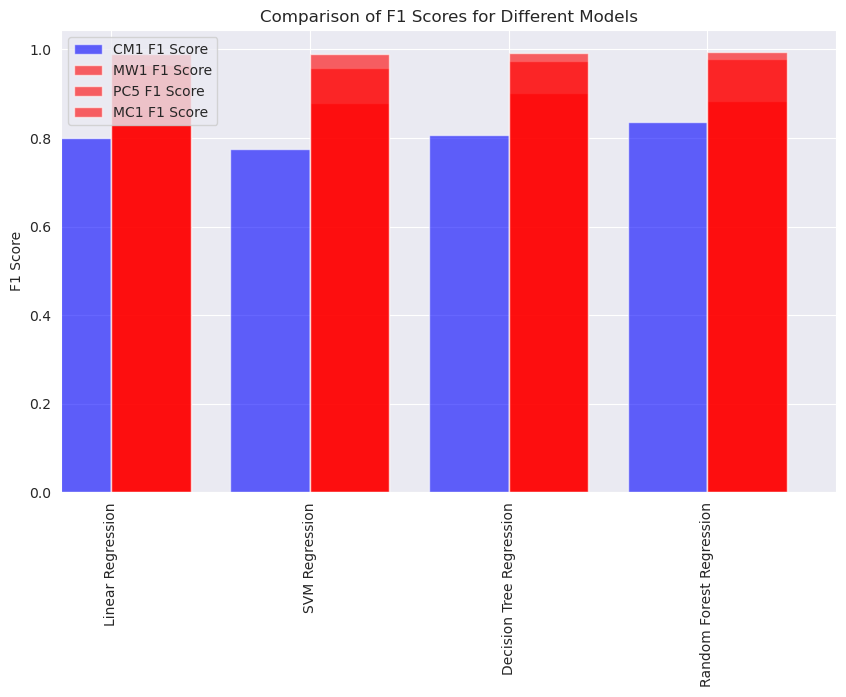

In [59]:
fig, ax = plt.subplots(figsize=(10, 6))
results_kc1_df.loc['F1 Score'].plot(kind='bar', color='b', alpha=0.6, ax=ax, position=1, width=0.4, label='CM1 F1 Score')
results_mw1_df.loc['F1 Score'].plot(kind='bar', color='r', alpha=0.6, ax=ax, position=0, width=0.4, label='MW1 F1 Score')
results_pc5_df.loc['F1 Score'].plot(kind='bar', color='r', alpha=0.6, ax=ax, position=0, width=0.4, label='PC5 F1 Score')
results_mc1_df.loc['F1 Score'].plot(kind='bar', color='r', alpha=0.6, ax=ax, position=0, width=0.4, label='MC1 F1 Score')

plt.title("Comparison of F1 Scores for Different Models")
plt.ylabel('F1 Score')
plt.legend()
plt.show()